# Preprocessing 

In [2]:
import os
import re
import matplotlib.pyplot as plt
from collections import Counter
import random
import pandas as pd
import string
from IPython.display import HTML, display
import random 

In [3]:
def preprocessing(filename): 
    
    tokenized_sentences = []

    with open(filename, encoding="utf-8") as f: 
        for line in f: 
            
            # remove non-alphabetical characters 
            line = ''.join(e for e in line if e.isalpha() or e == ' ')
            
            # tokenize 
            line = line.split()
            tokenized_sentences.append(line)
    print(filename[-2:], 'processed')
    return tokenized_sentences

bg_sent = preprocessing('corpora/corpus.bg')
de_sent = preprocessing('corpora/corpus.de')
el_sent = preprocessing('corpora/corpus.el')
fi_sent = preprocessing('corpora/corpus.fi')
fr_sent = preprocessing('corpora/corpus.fr')
mt_sent = preprocessing('corpora/corpus.mt')

bg processed
de processed
el processed
fi processed
fr processed
mt processed


def preprocessing(directory):
    """Preprocesses multingual corpus. Removes 
    non-alphabetical characters and whitespace. 
    Tokenizes."""
    
    corpus_dic = {}
    
    #Current path - absolute path
    script_path = os.path.abspath('') + "/corpora/" 
    
    for fname in os.listdir(directory): # list of all files in the directory 
        tokenized_sentences = []
        with open(os.path.join(script_path, fname), encoding="utf-8") as f:
            for line in f:

                #Delete non-alphabetical characters
                line = ''.join(e for e in line if e.isalpha() or e is " ")

                #Tokenize
                line = line.split()
                tokenized_sentences.append(line)

        corpus_dic[fname[-2:]] = tokenized_sentences  # list
        print(fname[-2:], " processed")

    return corpus_dic
corpus_dic = preprocessing('corpora')

In [4]:
corpus_dic = {}

corpus_dic['bg'] = bg_sent
corpus_dic['de'] = de_sent
corpus_dic['el'] = el_sent
corpus_dic['fi'] = fi_sent
corpus_dic['fr'] = fr_sent
corpus_dic['mt'] = mt_sent
    

# 1.1. Zipf's law

In [5]:
# joins sentences in one long list instead of sublists inside of a list 

joint_lists_dic = {}

for k, v in corpus_dic.items(): 
    joint_lists = [j for i in v for j in i]
    joint_lists_dic[k] = joint_lists

# 1.1. a) Zipfian word distirbution 

In [80]:
def word_freqs(corpus):
    #sort by descending word frquency
    counts = Counter(corpus)
    return dict(counts.most_common())

bulgarian = word_freqs(joint_lists_dic['bg'])
german = word_freqs(joint_lists_dic['de'])
greek = word_freqs(joint_lists_dic['el'])
finnish = word_freqs(joint_lists_dic['fi'])
french = word_freqs(joint_lists_dic['fr'])
maltese = word_freqs(joint_lists_dic['mt'])

#print(bulgarian)

#print(len(list(range(1, len(bulgarian)+1))))
#print(list(bulgarian.values()))


{'на': 94731, 'за': 40051, 'и': 35113, 'от': 32473, 'в': 26570, 'да': 17078, 'се': 16301, 'с': 12654, 'г': 12140, 'по': 9181, 'е': 8942, 'или': 8788, 'член': 5612, 'Комисията': 5331, 'не': 5226, 'са': 5107, 'ЕС': 5105, 'че': 5040, 'като': 4656, 'към': 4567, 'които': 4541, 'Европейския': 4474, 'Регламент': 4155, 'относно': 3921, 'Съвета': 3792, 'до': 3753, 'ЕО': 3593, 'параграф': 3480, 'при': 3146, 'стр': 2923, 'В': 2876, 'съответствие': 2769, 'бъде': 2727, 'съюз': 2642, 'Споразумението': 2637, 'ОВ': 2626, 'това': 2576, 'L': 2554, 'страна': 2210, 'може': 2169, 'следва': 2155, 'настоящото': 2136, 'Решение': 2132, 'отношение': 2117, 'Съюза': 2080, 'между': 2048, 'трябва': 2042, 'както': 2002, 'която': 1960, 'решение': 1927, 'във': 1867, 'членки': 1778, 'информация': 1726, 'изпълнение': 1708, 'ще': 1691, 'парламент': 1682, 'всички': 1679, 'предвид': 1638, 'със': 1628, 'съгласно': 1603, 'тези': 1597, 'бъдат': 1592, 'споразумение': 1589, 'органи': 1588, 'продукти': 1538, 'ЕИП': 1516, 'Директ

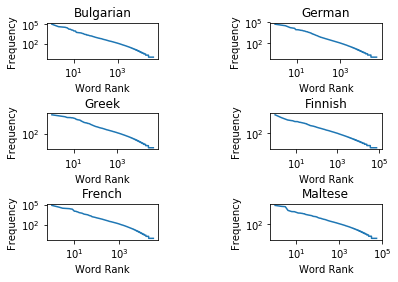

In [138]:
# Plotting the log curves
#x-axis represents the word rank and the y-axis represents the word frequency in the corpus.

plt.figure(1)

# bulgarian
plt.subplot(321)
plt.loglog(list(range(1, len(bulgarian) + 1)), list(bulgarian.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Bulgarian')

# german
plt.subplot(322)
plt.loglog(list(range(1, len(german) + 1)), list(german.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('German')

# greek
plt.subplot(323)
plt.loglog(list(range(1, len(greek) + 1)), list(greek.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Greek')

# finnish
plt.subplot(324)
plt.loglog(list(range(1, len(finnish) + 1)), list(finnish.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Finnish')

# french
plt.subplot(325)
plt.loglog(list(range(1, len(french) + 1)), list(french.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('French')

# maltese 
plt.subplot(326)
plt.loglog(list(range(1, len(maltese) + 1)), list(maltese.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Maltese')

plt.subplots_adjust(wspace = 1, hspace = 1.5)
plt.savefig('words_frequencies', format='eps')
plt.show()


# 1.1 b) The Principal of Least Effort

In [119]:
# compare the arithmetic mean of word lengths (measured by the number of characters) 
# of the top 10 most frequent words against a random sample of 10 words that occur only once in the corpus.

def least_effort(dic):
    least_freq = [k for k, v in dic.items() if int(v) == 1] 
    top_freq = list(dic.keys())[:10]
    
    freq_sum = 0
    for word in top_freq: 
        freq_sum += len(word)
    freq_mean = freq_sum / len(top_freq)
    
    random_words = random.sample(least_freq, 10)
    random_sum = 0
    for word in random_words: 
        random_sum += len(word)
    random_mean = random_sum / len(random_words)
    
    return freq_mean, random_mean
    
bg_freq_mean, bg_random_mean = least_effort(bulgarian)
german_freq_mean, bg_random_mean = least_effort(german)
greek_freq_mean, bg_random_mean = least_effort(greek)
finnish_freq_mean, bg_random_mean = least_effort(finnish)
french_freq_mean, bg_random_mean = least_effort(french)
maltese_freq_mean, bg_random_mean = least_effort(maltese)


TypeError: 'bg_random_mean' is an invalid keyword argument for print()

In [126]:
#plot the table
avg_wordlengths = {'Bulgarian': list(least_effort(bulgarian)), 'German': list(least_effort(german)), 'Greek': list(least_effort(greek)), 'Finnish': list(least_effort(finnish)), 'French': list(least_effort(french)), 'Maltese': list(least_effort(maltese))}
print('Average Word Lengths of Most Frequent Words vs Random Words')
data = avg_wordlengths
print(pd.DataFrame(data))

Average Word Lengths of Most Frequent Words vs Random Words
   Bulgarian  German  Greek  Finnish  French  Maltese
0        1.6     3.0    2.7      4.5     2.1      3.1
1        7.2    13.5    8.0     12.2     8.2     10.4


# 1.1. c) Zipfian character distribution

In [145]:
def char_freqs(corpus):
    corp = "".join(corpus)
    counts = Counter(corp)
    return dict(counts.most_common())

bulgarian_char_counts = char_freqs(joint_lists_dic['bg'])
german_char_counts = char_freqs(joint_lists_dic['de'])
greek_char_counts = char_freqs(joint_lists_dic['el'])
finnish_char_counts = char_freqs(joint_lists_dic['fi'])
french_char_counts = char_freqs(joint_lists_dic['fr'])
maltese_char_counts = char_freqs(joint_lists_dic['mt'])

#print(bulgarian_char_counts)
#{'а': 699177, 'и': 557768, 'е': 537411, 'о': 529115, 'н': 488565, 'т': 464146, 'р': 323028, 'с': 285432, 'в': 261382, 'л': 186409,


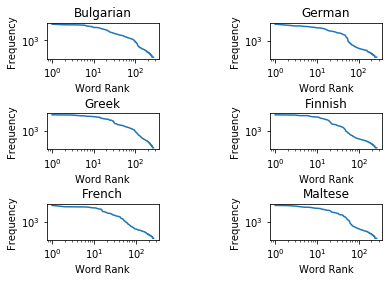

In [137]:
# Plotting the log curves
#x-axis represents the word rank and the y-axis represents the word frequency in the corpus.

plt.figure(1)

# bulgarian
plt.subplot(321)
plt.loglog(list(range(1, len(bulgarian_char_counts) + 1)), list(bulgarian_char_counts.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Bulgarian')

# german
plt.subplot(322)
plt.loglog(list(range(1, len(german_char_counts) + 1)), list(german_char_counts.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('German')

# greek
plt.subplot(323)
plt.loglog(list(range(1, len(greek_char_counts) + 1)), list(greek_char_counts.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Greek')

# finnish
plt.subplot(324)
plt.loglog(list(range(1, len(finnish_char_counts) + 1)), list(finnish_char_counts.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Finnish')

# french
plt.subplot(325)
plt.loglog(list(range(1, len(french_char_counts) + 1)), list(french_char_counts.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('French')

# maltese 
plt.subplot(326)
plt.loglog(list(range(1, len(maltese_char_counts) + 1)), list(maltese_char_counts.values()))
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.title('Maltese')

plt.subplots_adjust(wspace = 1, hspace = 1.5)
plt.savefig('char_frequencies', format='eps')
plt.show()

In [179]:
print(sum([1,2]))

sum(list(bulgarian_char_counts.values()))
#print(sum(list(bulgarian_char_counts.values())))

TypeError: 'int' object is not callable

In [176]:
def plotting(corpus):
    char_list = [x[0] for x in list(corpus.items())[:10]]
    rel_freq = [v / sum(corpus.values()) for v in list(corpus.values())[:10]]
    return char_list, rel_freq

bg_char_list, bg_char_rel_freq = plotting(bulgarian_char_counts)
de_char_list, de_char_rel_freq = plotting(german_char_counts)
el_char_list, el_char_rel_freq = plotting(greek_char_counts)
fi_char_list, fi_char_rel_freq = plotting(finnish_char_counts)
fr_char_list, fr_char_rel_freq = plotting(french_char_counts)
mt_char_list, mt_char_rel_freq = plotting(maltese_char_counts)


#plot the table
print('10 most frequent letters in descending order by language')

bg = {'Bulgarian': bg_char_list, 'Rel Freq': bg_char_rel_freq}
print(pd.DataFrame(bg))

de = {'German': de_char_list, 'Rel Freq': de_char_rel_freq}
print(pd.DataFrame(de))

el = {'Greek': el_char_list, 'Rel Freq': el_char_rel_freq}
print(pd.DataFrame(el))

fi = {'Finnish': fi_char_list, 'Rel Freq': fi_char_rel_freq}
print(pd.DataFrame(fi))

fr = {'French': fr_char_list, 'Rel Freq': fr_char_rel_freq}
print(pd.DataFrame(fr))

mt = {'Maltese': mt_char_list, 'Rel Freq': mt_char_rel_freq}
print(pd.DataFrame(mt))



TypeError: 'int' object is not callable

def rel_freq(corpus): 
    rel_freq_dic = {}
    
    for character, count in corpus.items(): 
        rel_freq = count / sum(list(corpus.values()))
        rel_freq_dic[k] = rel_freq
        
    return rel_freq_dic
        
    
bulgarian_char_rel_freq = rel_freq(bulgarian_char_counts)